<a href="https://colab.research.google.com/github/yeong0000/Python/blob/main/ml04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning(기계 학습)

사람의 지도가 필요한 지 여부에 따라서
*  지도 학습(supervised learning): 레이블이 있는 데이터를 학습.
    *  분류(classification): 클래스(카테고리)를 분류.
        *  예: 도미-빙어, setosa-versicolor-virginica, ...
    *  회귀(regression): 숫자를 예측.
        *  예: 주가 예측, 집값 예측, ...
*  비지도 학습(unsupervised learning): 레이블이 없는 데이터를 학습.


#  문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 물고기의 다른 특성을 이용해서 예측.

*  Perch(농어)의 무게 예측
    *  무게를 길이만으로 예측: Weight(종속변수) ~ Length(독립변수)
    *  무게를 다른 모든 특성들을 사용해서 예측: Weight ~ Length + Diagonal + Height + Width

*  용어:
    *  예측하고자 하는 값: 타겟, 레이블, 관심 변수, 종속 변수
    *  예측하기 위해서 필요한 값(변수): 특성(feature), 독립 변수

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 수치 예측.


# 데이터 준비

In [ ]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [ ]:
# CSV 파일을 읽어서 DataFrame을 생성
fish_df = pd.read_csv(fish_csv)

In [ ]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# fish_df에서 'Perch' 어종만 선택:
perch = fish_df[fish_df.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [ ]:
# X: 특성 (2차원) 배열. 길이만 선택. (n_samples, n_features) = (56, 1)
X = perch[['Length']].values

# y: 타겟 (1차원) 배열. 레이블. 무게. (n_samples,) = (56,)
y = perch['Weight'].values

In [ ]:
X.shape

(56, 1)

In [ ]:
y.shape

(56,)

# 훈련 셋(75%), 테스트 셋(25%) 분리

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)
# random sampling(임의 추출)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

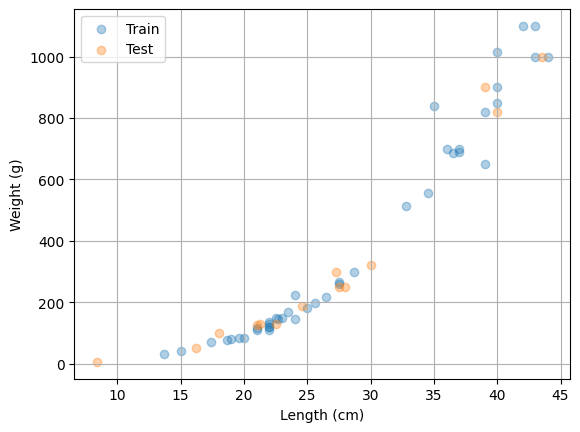

In [ ]:
# 훈련 셋 시각화(Weight ~ Length)
plt.scatter(x=X_tr.ravel(), y=y_tr, label='Train', alpha=0.35)

# 테스트 셋 시각화
plt.scatter(x=X_te.ravel(), y=y_te, label='Test', alpha=0.35)

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.show()

# KNN Regressor 모델 훈련, 평가

1. KNN Regressor 객체 생성(생성자 호출)
1. KNN Regressor 훈련 셋으로 학습시킴(fit)
1. 훈련 셋의 예측값 계산(predict), 실젯값과 비교
1. 테스트 셋의 예측값 계산, 실젯값과 비교


## KNN 모델 생성

In [ ]:
knn = KNeighborsRegressor()

## 모델 훈련

In [ ]:
knn.fit(X_tr, y_tr)

KNeighborsRegressor()

## 훈련 셋 예측 결과 평가

In [ ]:
y_tr_pred = knn.predict(X_tr)

In [ ]:
print(y_tr_pred)  # 훈련 셋의 예측값 출력

[  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [ ]:
print(y_tr)  # 훈련 셋의 실젯값

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


KNN(K-Nearest Neighbors) 회귀(Regression):

k개의 가장 가까운 이웃(훈련 셋 샘플)들을 찾아서, 샘플들의 평균으로 숫자를 예측하는 머신 러닝 모델.

In [ ]:
# 훈련 셋 중에서 인덱스 0번 샘플의 가장 가까운 이웃들의 인덱스:
indices = knn.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
indices

array([[ 0, 10, 36,  2, 17]])

In [ ]:
# 인덱스 0번 샘플에서 가장 가까운 이웃 5개의 무게들:
y_tr[indices[0]]

array([ 85.,  85.,  80.,  78., 115.])

In [ ]:
# 인덱스 0번 샘플에서 가장 가까운 이웃 5개의 무게들의 평균 -> KNN의 예측값
np.mean(y_tr[indices[0]])

88.6

## 회귀 모델 평가 지표

*  **MAE(Mean Absolute Error)**: 오차들의 절대값의 평균.
*  **MSE(Mean Squared Error)**: 오차들의 제곱의 평균.
*  **RMSE(Root Mean Squared Error)**: MSE의 제곱근.
*  MAE, MSE, RMSE는 값이 작을 수록 좋은 점수. 값이 작을 수록 더 좋은 회귀 모델.
    *  평가 지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수로 생각.
    *  회귀에서도 오차가 작을 수록 점수가 높아지고, 오차가 클 수록 점수가 낮아지는 평가 지표를 개발 -> R2 score(결정계수)
    *  R2 score는 1에 가까울 수록 오차가 작은 모델, 작을 수록 오차가 큰 모델.

---

*  $ y_i $ : $i$번째 샘플의 실젯값(label)
*  $ \hat{y_i} $ : $i$번째 샘플의 예측값
*  $ \bar{y} $ : 타겟의 평균값
*  $ n $ : 샘플 개수

*  **MAE(Mean Absolute Errors)**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

*  **MSE(Mean Squared Errors)**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

*  **RMSE(Root Mean Squared Errors)**
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

*  **$ R^2 $ score(Coefficient of determinant, 결정 계수)**
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}}
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    *  결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    *  모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    *  모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    *  모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    *  모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.


In [ ]:
# 훈련 셋의 MAE
mean_absolute_error(y_tr, y_tr_pred)

35.76190476190476

In [ ]:
# 훈련 셋의 MSE
mse = mean_squared_error(y_tr, y_tr_pred)
mse

3716.5161904761903

In [ ]:
# 훈련 셋의 RMSE
np.sqrt(mse)

60.96323638453089

In [ ]:
# 훈련 셋의 R2 score(결정 계수)
r2_score(y_tr, y_tr_pred)

0.9698823289099254

scikit-learn 패키지의 모든 ML 알고리즘 클래스들은 평가 점수를 리턴하는 메서드(`scroe(X, y)`)를 가지고 있음.

score 메서드는 아규먼트로 전달된 특성 배열(X)로 예측값을 먼저 계산하고, 아규먼트로 전달된 타겟(y)와 비교해서 평가 점수를 계산:
*  분류: 정확도
*  회귀: 결정 계수

In [ ]:
knn.score(X_tr, y_tr)

0.9698823289099254

## 테스트 셋의 예측 결과 평가

In [ ]:
y_te_pred = knn.predict(X_te)  # 테스트 셋의 무게 예측값

In [ ]:
print(y_te_pred)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [ ]:
print(y_te)  # 실젯값

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
mse_te = mean_squared_error(y_te, y_te_pred)  # 테스트 셋의 MSE
mse_te

721.7385714285714

In [ ]:
np.sqrt(mse_te)  # 테스트 셋 RMSE

26.865192562655704

In [ ]:
r2_score(y_te, y_te_pred)  # 테스트 셋 결정 계수

0.992809406101064

# 선형 회귀(Linear Regression)

머신 러닝 알고리즘:

*  사례 기반 학습(instance-based learning):
    *  KNN, Decision Tree, ...
    *  수학적인 모델을 만들지 않고, 훈련 셋의 데이터 특성과 레이블들을 사용해서 예측.
    *  outlier(이상치)들이 많은 경우에는 성능이 나빠질 수 있음.
*  모델 기반 학습(model-based learning):
    *  Logistic Regression, Linear Regression, ...
    *  훈련 셋을 사용해서 수학적인 모델을 만들고, 그 모델을 사용해서 예측.

---

*  선형 회귀에서 학습이란
$$
    y = a \times x + b
$$
수학 모델에서, MSE가 최소가 되도록 하는 직선의 기울기(a)와 y절편(b)를 찾는 과정.

## 선형 회귀 모델 생성

In [ ]:
lin_reg = LinearRegression()

## 훈련 셋으로 모델 학습

In [ ]:
lin_reg.fit(X_tr, y_tr)
#> 학습 -> 직선의 방정식에서 기울기(coefficient)와 y절편(intercept)을 찾음.

LinearRegression()

In [ ]:
lin_reg.coef_

array([39.01714496])

In [ ]:
lin_reg.intercept_

-709.0186449535477

$$
    weight = 39.017 \times lenght - 709.018
$$

## 선형회귀에서 훈련 셋 예측 결과 평가

In [ ]:
y_tr_pred = lin_reg.predict(X_tr)

In [ ]:
print(y_tr_pred)

[  55.71739633  149.35854425   20.60196587  -30.12032259  695.59857374
  266.40997914  851.66715359  812.65000863  968.71858848  149.35854425
   71.32425432  149.35854425  227.39283417  363.95284155  968.71858848
  851.66715359  227.39283417  110.34139928  363.95284155  851.66715359
  570.74370985  324.93569658  715.10714622 -174.48375895  176.67054572
 -123.7614705   734.6157187   656.58142877  410.7734155   207.88426169
  812.65000863  110.34139928  188.37568921  149.35854425 1007.73573345
  168.86711673   32.30710936  734.6157187   149.35854425  289.82026612
  929.70144352  637.07285629]


In [ ]:
print(y_tr)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
mean_squared_error(y_tr, y_tr_pred)
#> KNN에서의 MSE보다 큼 -> Linear Regression의 성능이 KNN보다 나쁘다.

7422.953552609781

In [ ]:
r2_score(y_tr, y_tr_pred)
#> KNN의 결정계수보다 작음 -> 성능이 나쁘다.

0.939846333997604

## 테스트 셋 예측 결과 평가

In [ ]:
y_te_pred = lin_reg.predict(X_te)

In [ ]:
print(y_te_pred)

[-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


In [ ]:
print(y_te)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
mean_squared_error(y_te, y_te_pred)

17590.265977889187

In [ ]:
r2_score(y_te, y_te_pred)

0.8247503123313558

## 훈련 셋, 테스트 셋, 선형 회귀 방정식 시각화

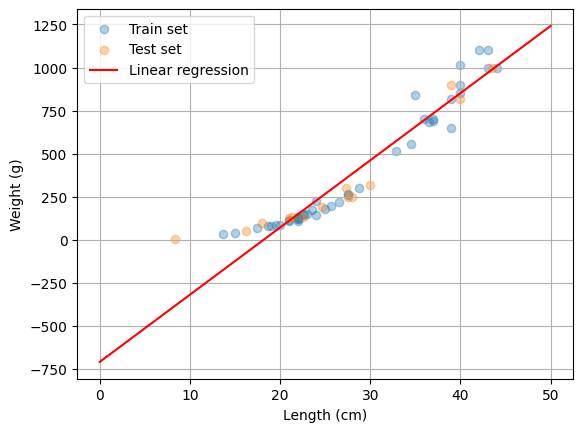

In [ ]:
# 훈련 셋 시각화
plt.scatter(x=X_tr.ravel(), y=y_tr, alpha=0.35, label='Train set')

# 테스트 셋 시각화
plt.scatter(x=X_te.ravel(), y=y_te, alpha=0.35, label='Test set')

# 선형 회귀 방정식 시각화
x = np.arange(0, 50, 0.01)  # [0, 0.01, 0.02, 0.03, ..., 49.98, 49.99]
a = lin_reg.coef_[0]  # 직선의 기울기
b = lin_reg.intercept_  # 직선의 y절편
y = a * x + b  # 선형 회귀 방정식
plt.plot(x, y, 'r-', label='Linear regression')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.legend()

plt.show()

# 2차항을 포함하는 선형 회귀

In [ ]:
X_tr[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
X_tr_poly = np.c_[X_tr ** 2, X_tr]  # Length의 2차항을 포함하는 특성 배열

In [ ]:
X_tr_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

## 선형 회귀 모델 생성

In [ ]:
lin_reg = LinearRegression()

## 2차항을 포함하는 훈련 셋으로 학습

In [ ]:
lin_reg.fit(X_tr_poly, y_tr)

LinearRegression()

In [ ]:
lin_reg.coef_

array([  1.01433211, -21.55792498])

In [ ]:
lin_reg.intercept_

116.0502107827827

$$
    weight = 1.01 \times length^2 - 21.55 \times length + 116.05
$$

## 훈련 셋의 예측 결과 평가

In [ ]:
y_tr_pred = lin_reg.predict(X_tr_poly)

In [ ]:
print(y_tr_pred)

[  83.18070434  132.71260219   67.61880901   48.04150559  654.5393253
  211.05965467  876.66458663  818.09027497 1064.55950693  132.71260219
   90.62455496  132.71260219  182.91530629  290.29593158 1064.55950693
  876.66458663  182.91530629  110.65424646  290.29593158  876.66458663
  500.20932803  257.07992265  680.52990177   11.08663218  149.3605064
   20.90606071  707.0276443   604.07967051  332.83297906  169.60388118
  818.09027497  110.65424646  156.79962213  132.71260219 1131.24847547
  144.50252913   72.62352767  707.0276443   132.71260219  228.92002253
  999.89920261  579.6105922 ]


In [ ]:
mean_squared_error(y_tr, y_tr_pred)  # KNN의 MSE와 비슷

3617.9917403639624

In [ ]:
r2_score(y_tr, y_tr_pred)  # KNN의 결정 계수와 비슷

0.9706807451768623

## 테스트 셋의 예측 결과 평가

In [ ]:
# 테스트 셋으로 예측하기 위해서는 특성(길이)의 2차항이 필요하기 때문에
X_te_poly = np.c_[X_te ** 2, X_te]

In [ ]:
y_te_pred = lin_reg.predict(X_te_poly)

In [ ]:
print(y_te_pred)

[   6.5349146    56.6511646   290.29593158  117.05874344  144.50252913
  876.66458663  382.21135986  199.55847561  818.09027497  110.65424646
 1097.65040817   33.01314491  307.66468513  283.49043666]


In [ ]:
mean_squared_error(y_te, y_te_pred)  # KNN의 MSE보다 큼

2248.9974694392704

In [ ]:
r2_score(y_te, y_te_pred)
#> 훈련 셋의 결정계수와 비슷 - 과대/과소적합이 거의 없음.

0.9775935108325122

## 훈련 셋, 테스트 셋, 2차항을 포함하는 선형회귀 방정식 시각화

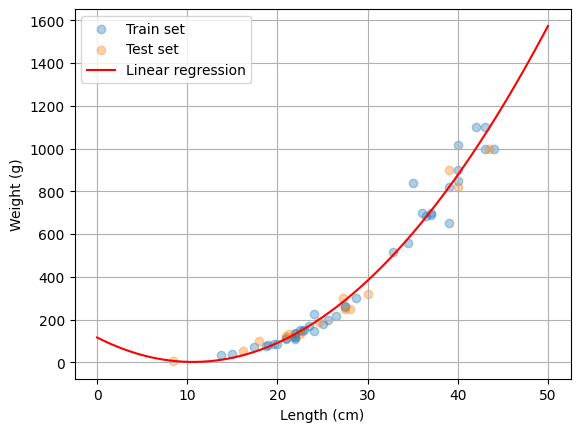

In [ ]:
# 훈련 셋 시각화
plt.scatter(x=X_tr.ravel(), y=y_tr, alpha=0.35, label='Train set')

# 테스트 셋 시각화
plt.scatter(x=X_te.ravel(), y=y_te, alpha=0.35, label='Test set')

# 선형 회귀 방정식 시각화
x = np.arange(0, 50, 0.001)  # [0, 0.001, 0.002, 0.003, ..., 49.998, 49.999]
a = lin_reg.coef_[0]  # x^2 항의 계수
b = lin_reg.coef_[1]  # x 항의 계수
c = lin_reg.intercept_  # 2차 함수의 y절편
y = a * x ** 2 + b * x + c  # 선형 회귀 방정식
plt.plot(x, y, 'r-', label='Linear regression')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.legend()

plt.show()

# 모든 특성들을 사용한 선형 회귀

$$
    y = \Sigma_{i=1}^{n} a_i \times x_i + b
$$

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch.iloc[:, 2:].values  # 특성 배열.

In [ ]:
X[:5]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [ ]:
X.shape

(56, 4)

In [ ]:
y = perch['Weight'].values  # 타겟 배열

In [ ]:
y.shape

(56,)

## 훈련 셋, 테스트 셋 분리

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

## 선형 회귀 모델 생성

In [ ]:
lin_reg = LinearRegression()

## 모델 훈련

In [ ]:
lin_reg.fit(X_tr, y_tr)

LinearRegression()

In [ ]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [ ]:
lin_reg.intercept_

-610.0275364260515

## 훈련 셋, 테스트 셋 평가 점수

In [ ]:
lin_reg.score(X_tr, y_tr)  # 훈련 셋 결정 계수

0.9567246116638569

In [ ]:
lin_reg.score(X_te, y_te)  # 테스트 셋 결정 계수 -> 과대적합(overfitting)

0.8790465615990273

# 모든 특성들의 2차항까지 고려한 선형 회귀

scikit-learn 패키지의 클래스:

*  변환기(transformer):
    *  모델 훈련 전에 전처리(preprocessing) 과정에서 특성들을 변환하기 위해서 사용.
    *  (예) StandarScaler, MinMaxScaler, PolynomialFeatures, ...
    *  `fit, transform, fit_transform` 메서드를 가지고 있음.
*  추정기(estimator):
    *  머신 러닝 알고리즘을 구현한 클래스.
    *  (예) KNeighborsClassifier, KNeighborsRegressor, LinearRegression, LogisticRegression, ...
    *  `fit, predict, score` 메서드를 가지고 있음.


In [ ]:
X_tr[:5]

array([[19.6   , 20.8   ,  5.1376,  3.0368],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408]])

In [ ]:
y_tr[:5]

array([ 85., 135.,  78.,  70., 700.])

## PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(include_bias=False)  # 특성들의 2차항을 만들어 주는 변환기

In [ ]:
X_tr_poly = poly.fit_transform(X_tr)  # 훈련 셋을 변환(2차항들을 포함)

In [ ]:
X_tr_poly.shape

(42, 14)

In [ ]:
X_tr_poly[:2]  # 2차항들이 추가됨 -> 컬럼 14개

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        384.16      , 407.68      , 100.69696   ,  59.52128   ,
        432.64      , 106.86208   ,  63.16544   ,  26.39493376,
         15.60186368,   9.22215424],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        484.        , 517.        , 129.25      ,  77.55      ,
        552.25      , 138.0625    ,  82.8375    ,  34.515625  ,
         20.709375  ,  12.425625  ]])

In [ ]:
poly.get_feature_names_out()  # 2차항이 포함된 컬럼들의 순서

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
poly.get_feature_names_out(['length', 'diagonal', 'height', 'width'])

array(['length', 'diagonal', 'height', 'width', 'length^2',
       'length diagonal', 'length height', 'length width', 'diagonal^2',
       'diagonal height', 'diagonal width', 'height^2', 'height width',
       'width^2'], dtype=object)

## Pipeline

변환기와 추정기를 연결해서 항상 같은 순서로 변환을 하고 예측을 하기 위한 클래스.

In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('reg', LinearRegression())
])

### Pipeline을 사용한 ML 모델 훈련

In [ ]:
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
pipe['reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [ ]:
pipe['reg'].intercept_

67.36628210104692

### 훈련 셋의 예측 결과 평가

In [ ]:
y_tr_pred = pipe.predict(X_tr)  # 훈련 셋 예측값

In [ ]:
r2_score(y_tr, y_tr_pred)  # 훈련 셋 결정 계수

0.9920055538341142

### 테스트 셋 예측 결과 평가

In [ ]:
y_te_pred = pipe.predict(X_te)  # 테스트 셋 예측값

In [ ]:
r2_score(y_te, y_te_pred)  # 테스트 셋 결정 계수

0.949260960155303